# Financial Inclusion (East Africa)

By: Andrew Wairegi

**Data definitions:**

*   Country - Country of Interviewee
*   Year - Year of Survey
*   Uniqueid - Unique Identifier for interviewee
*   bank_account - Has bank account (Yes / No)
*   location_type - Location (Rural / Urban)
*   cellphone_access - Access to cellphone (Yes / No)
*   household_size - Number of people living in the house
*   age_of_respondent - Age of the respondent
*   gender_of_respondent - Gender (Male / Female)
*   relationship_with_head - Relationship with head of household (Head of Household / Spouse / Child / Parent / Other relative / Other non-relatives / Dont know)
*   marital_status - Marital status ("Married/Living together" / "Divorced/Seperated" / "Widowed" / "Single/Never Married" / "Don’t know")
*   education_level - Highest level of Education ("No formal education" / "Primary education" / "Secondary education" / "Vocational/Specialised training" / "Tertiary education" / "Other/Dont know/RTA")
*   job_type - Type of job ("Farming and Fishing" / "Self employed" / "Formally employed Government" / "Formally employed Private" / "Informally employed" / "Remittance Dependent" / "Government Dependent" / "Other Income" / "No Income" / "Dont Know/Refuse to answer")











## 1. Defining the Question

<a name = "defining_question">

### a) Specifying the question

To create a machine learning model, that allows Finscope to be able to predict whether a person will be financially included or not. Based on their quantitative data.

### b) Defining Metric for success

An accuracy score of over 80%. On both predicting that a person will be financially included or not. Would mean that the model is successfull.

### c) Understanding the context

The countries have undertaken a study to determine whether individuals are financially included in their country or not. However, they want to have a clear way of determining whether a person will be financially included or not. That is why they have turned to Finscope to conduct the study.

### d) Experimental design

**Process:**

1. <a href = "#defining_question"> Defining the Question </a>
2. <a href = "#data_loading"> Data Loading </a>
3. <a href = "#previewing_data"> Previewing Data </a>
4. <a href = "#cleaning_data"> Cleaning Data </a>
5. <a href = "#data_preparation"> Data Preparation </a>
6. <a href = "#EDA"> Exploratory Data Analysis (EDA) </a>
7. <a href = "#implementing_solution"> Implementing the Solution </a>
8. <a href = "#challenging_solution">  Challenging the solution </a>
9. <a href = "#conclusion"> Conclusion </a>
10. <a href = "#recommendation"> Recommendation </a>
11. <a href = "#follow_questions">  Follow up questions </a>

### e) Data relevance

I believe the data is relevant. Because it was carried out by the countries. This means they were able to get accurate data about the people in their population. This means that all the data is true, and it can be used for the analysis and model creation.

## 2. Reading the data

<a name="data_loading"/>

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [ ]:
# Reading the data
df = pd.read_csv("financial_inclusion_train.csv")
df.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

## 3. Previewing the data

<a name = "previewing_data"/>



In [ ]:
# Number of records
df.shape

(23524, 13)

In [ ]:
# Top of dataset
df.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [ ]:
# Tail of dataset
df.tail()

country  year       uniqueid bank_account location_type  \
23519  Uganda  2018  uniqueid_2113           No         Rural   
23520  Uganda  2018  uniqueid_2114           No         Rural   
23521  Uganda  2018  uniqueid_2115           No         Rural   
23522  Uganda  2018  uniqueid_2116           No         Urban   
23523  Uganda  2018  uniqueid_2117           No         Rural   

      cellphone_access  household_size  age_of_respondent  \
23519              Yes               4                 48   
23520              Yes               2                 27   
23521              Yes               5                 27   
23522              Yes               7                 30   
23523              Yes              10                 20   

      gender_of_respondent relationship_with_head        marital_status  \
23519               Female      Head of Household    Divorced/Seperated   
23520               Female      Head of Household  Single/Never Married   
23521               Female                 Parent               Widowed   
23522               Female                 Parent    Divorced/Seperated   
23523                 Male                  Child  Single/Never Married   

           education_level       job_type  
23519  No formal education   Other Income  
23520  Secondary education   Other Income  
23521    Primary education   Other Income  
23522  Secondary education  Self employed  
23523  Secondary education      No Income

In [ ]:
# Checking if datatypes are appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## 4. Cleaning the Data

<a name = "cleaning_data">

In [ ]:
# 1. Checking for null values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
# 2. Checking for duplicates
df.duplicated().sum()

0

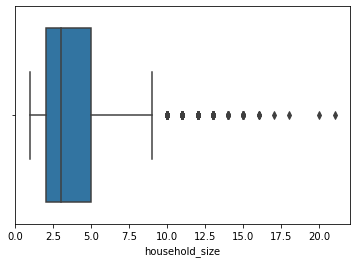

In [ ]:
# 3. Checking for outliers
# this will be done for the continuous value columns, 
# and not the value counts
sns.boxplot(data = df, x = "household_size")

In [ ]:
# Some households have very many people, for example in Indian houses in Kenya,
# Also there may be some countries where they are poor. So they choose to live in many numbers,
# on one property. This could be the reason for the high household number.

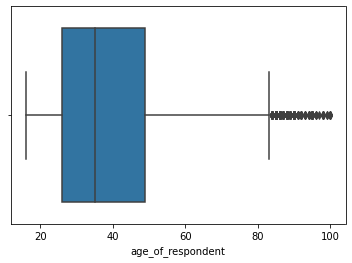

In [ ]:
sns.boxplot(data = df, x = "age_of_respondent")

In [ ]:
# It is normal to have respondents ages ranging from 0 - 100.
# So it is not abnormal. Also the mean is around 40, so it is not abnormal.

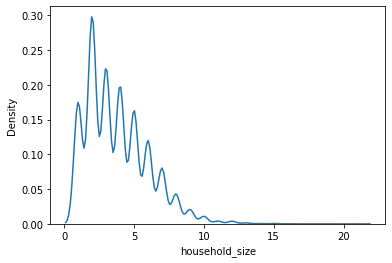

In [ ]:
# 4. Checking for anomalies
sns.kdeplot(data = df, x = "household_size")

In [ ]:
# It's normal for the household size to go up and down
# as there are different household sizes that are regarded normal.
# So there may be different maxes between house size ranges.

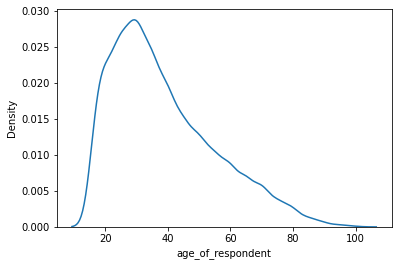

In [ ]:
sns.kdeplot(data = df, x = "age_of_respondent")

In [ ]:
# This is very normal, as if the survey was being done on the population.
# Most people live between 0 & 100. The peak should be around 40, for household owners.
# Then it should decrease dramatically as age increases.

In [ ]:
# 5. Changing column names
# They are all ok, as they appear to have underscores
# between the names. They are all also in lowercase, so that is ok.

In [ ]:
# 6. Removing whitespaces from column names
# & values

# Columns names
df.columns = df.columns.str.strip()

# Column values
string_columns = ["bank_account", "location_type", "cellphone_access", "gender_of_respondent", "relationship_with_head", "marital_status", "education_level", "job_type"]
df[string_columns] = df[string_columns].applymap(str.strip)

In [ ]:
# 7. Dropping unneeded columns 
df.drop(["country", "year","uniqueid"], axis = 1, inplace = True)

## 5. Data preparation

<a name = "data_preparation"/>

In [ ]:
# Creating a numeric DF
df_numeric = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()

In [ ]:
df.head()

bank_account location_type cellphone_access  household_size  \
0          Yes         Rural              Yes               3   
1           No         Rural               No               5   
2          Yes         Urban              Yes               5   
3           No         Rural              Yes               5   
4           No         Urban               No               8   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 24               Female                 Spouse   
1                 70               Female      Head of Household   
2                 26                 Male         Other relative   
3                 34               Female      Head of Household   
4                 26                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary education   
1                  Widowed              No formal education   
2     Single/Never Married  Vocational/Specialised training   
3  Married/Living together                Primary education   
4     Single/Never Married                Primary education   

                    job_type  
0              Self employed  
1       Government Dependent  
2              Self employed  
3  Formally employed Private  
4        Informally employed

In [ ]:
# Converting categorical columns to numeric

In [ ]:
df_numeric["location_type"] = Labelencoder.fit_transform(df_numeric["location_type"])
Labelencoder_mapping = dict(zip(Labelencoder.classes_, Labelencoder.transform(Labelencoder.classes_)))
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'Rural': 0, 'Urban': 1}


In [ ]:
name_mappings = {"Other non-relatives": 0, "Other relative": 1, "Child": 2, "Spouse": 3, "Parent": 4, "Head of Household": 5}
df_numeric["relationship_with_head"] = df_numeric["relationship_with_head"].replace(name_mappings)
print("Name mappings" + "\n" + str(name_mappings))

Name mappings
{'Other non-relatives': 0, 'Other relative': 1, 'Child': 2, 'Spouse': 3, 'Parent': 4, 'Head of Household': 5}


In [ ]:
name_mappings = {"Dont know": 0, "Single/Never Married": 1, "Divorced/Seperated": 2, "Widowed": 3, "Married/Living together": 4}
df_numeric["marital_status"] = df_numeric["marital_status"].replace(name_mappings)
print("Name mappings" + "\n" + str(name_mappings))

Name mappings
{'Dont know': 0, 'Single/Never Married': 1, 'Divorced/Seperated': 2, 'Widowed': 3, 'Married/Living together': 4}


In [ ]:
name_mappings = {"No formal education": 0, "Other/Dont know/RTA": 1, "Primary education": 2, "Secondary education": 3, "Tertiary education": 4, "Vocational/Specialised training": 5}
df_numeric["education_level"] = df_numeric["education_level"].replace(name_mappings)
print("Name mappings" + "\n" + str(name_mappings))

Name mappings
{'No formal education': 0, 'Other/Dont know/RTA': 1, 'Primary education': 2, 'Secondary education': 3, 'Tertiary education': 4, 'Vocational/Specialised training': 5}


In [ ]:
df["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [ ]:
name_mappings = {"Dont Know/Refuse to answer": 0, "No Income": 1, "Other Income": 2, "Remittance Dependent": 3, "Informally employed": 4, "Government Dependent": 5,"Farming and Fishing": 6, "Formally employed Government": 7, "Formally employed Private": 8, "Self employed": 9}
df_numeric["job_type"] = df_numeric["job_type"].replace(name_mappings)
print("Name mappings" + "\n" + str(name_mappings))

Name mappings
{'Dont Know/Refuse to answer': 0, 'No Income': 1, 'Other Income': 2, 'Remittance Dependent': 3, 'Informally employed': 4, 'Government Dependent': 5, 'Farming and Fishing': 6, 'Formally employed Government': 7, 'Formally employed Private': 8, 'Self employed': 9}


In [ ]:
df_numeric["cellphone_access"] = df_numeric["cellphone_access"].replace({"Yes": 1, "No": 0})

In [ ]:
df_numeric["gender_of_respondent"] = df_numeric["gender_of_respondent"].replace({"Male": 1, "Female": 0})

In [ ]:
df_numeric["bank_account"] = df_numeric["bank_account"].replace({"Yes": 1, "No": 0})

In [ ]:
# Previewing the data
df_numeric.head()

bank_account  location_type  cellphone_access  household_size  \
0             1              0                 1               3   
1             0              0                 0               5   
2             1              1                 1               5   
3             0              0                 1               5   
4             0              1                 0               8   

   age_of_respondent  gender_of_respondent  relationship_with_head  \
0                 24                     0                       3   
1                 70                     0                       5   
2                 26                     1                       1   
3                 34                     0                       5   
4                 26                     1                       2   

   marital_status  education_level  job_type  
0               4                3         9  
1               3                0         5  
2               1                5         9  
3               4                2         8  
4               1                2         4

In [ ]:
# Checking the data types
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   bank_account            23524 non-null  int64
 1   location_type           23524 non-null  int64
 2   cellphone_access        23524 non-null  int64
 3   household_size          23524 non-null  int64
 4   age_of_respondent       23524 non-null  int64
 5   gender_of_respondent    23524 non-null  int64
 6   relationship_with_head  23524 non-null  int64
 7   marital_status          23524 non-null  int64
 8   education_level         23524 non-null  int64
 9   job_type                23524 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


## 5. Exploratory Data analysis

<a name = "EDA">

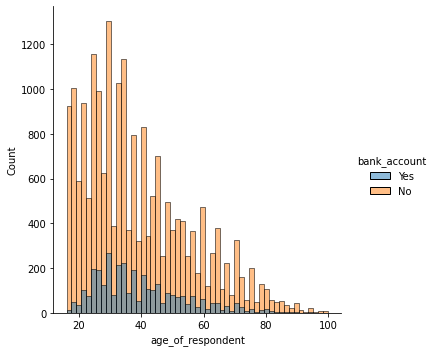

In [ ]:
sns.displot(data = df, x = "age_of_respondent", hue = "bank_account")

In [ ]:
# The distribution looks normal
# As the amount of people without a bank account
# decreases, so do the amount of people with a bank account.
# Which means it's equally distributed.

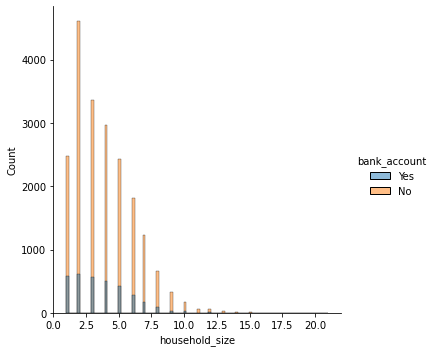

In [ ]:
sns.displot(data = df, x = "household_size", hue = "bank_account")

In [ ]:
# This is also equally distributed.
# As the number of people without a bank account decreases,
# so do the number of people with a bank account. So it is not a
# good indiactor of whether someone has a bank account or not.

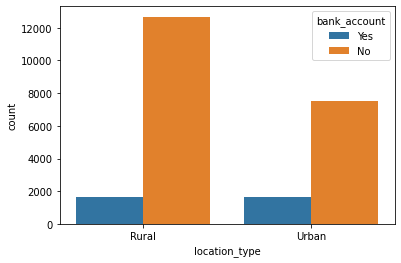

In [ ]:
sns.countplot(data = df, x = "location_type", hue = "bank_account")

In [ ]:
# Looks like if you live in a Rural setting,
# you are less likely to own a bank account

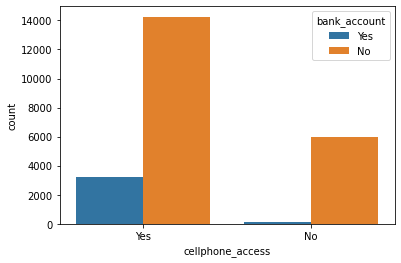

In [ ]:
sns.countplot(data = df, x = "cellphone_access", hue = "bank_account")

In [ ]:
# If someone does not have a phone, they
# are very unlikely to have a bank account

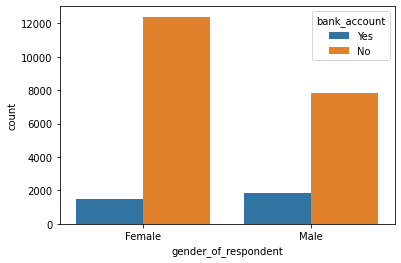

In [ ]:
sns.countplot(data = df, x = "gender_of_respondent", hue = "bank_account")

In [ ]:
# It seems females were more likely to
# have a bank account

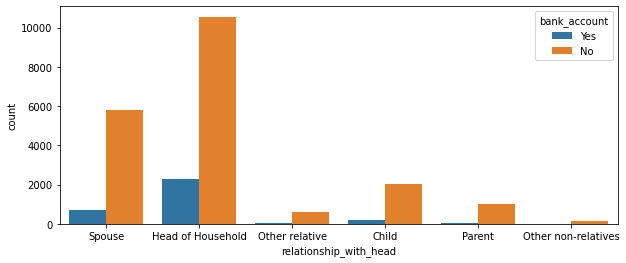

In [ ]:
plt.figure(figsize= (10, 4))
sns.countplot(data = df, x = "relationship_with_head", hue = "bank_account")

In [ ]:
# It seems that if you were the head of a household you were
# most likely to have a bank account. Followed by if you were a spouse,
# then a parent, then a child.

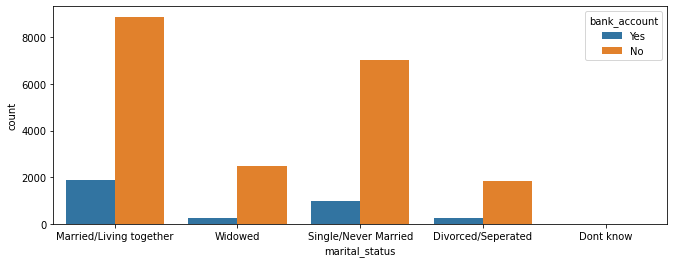

In [ ]:
plt.figure(figsize= (11, 4))
sns.countplot(data = df, x = "marital_status", hue = "bank_account")

In [ ]:
# If you were married you were more likely to have a bank account
# Followed by if you were single. Then divorced / seperated.
# Then widowed

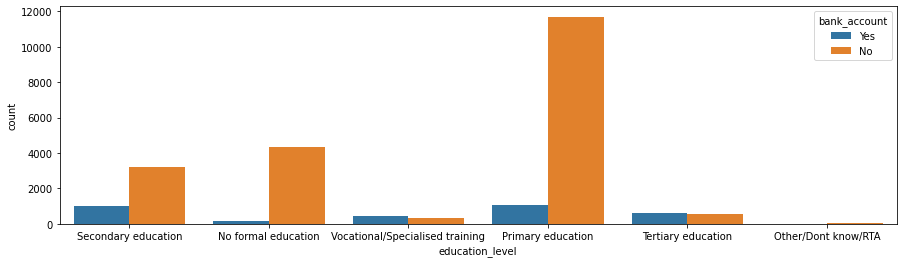

In [ ]:
plt.figure(figsize= (15, 4))
sns.countplot(data = df, x = "education_level", hue = "bank_account")

In [ ]:
# If you have specialised training you were more likely to have a bank account.
# Followed by tertiary education. Then secondary education, then primary education. Then non formal education.

In [ ]:
df["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

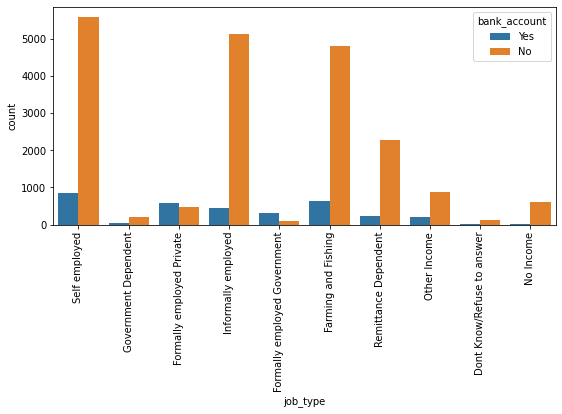

In [ ]:
plt.figure(figsize= (9, 4))
plt.xticks(rotation=90)
sns.countplot(data = df, x = "job_type", hue = "bank_account")

In [ ]:
# It seems that Formally employed was the most likely to have a bank account. 
# Then Government dependent, Then other income and self-employed. 

Overall is seems there are many factors that can determine whether you have a bank account or not. But they are not very determinant. Meaning you have to use most of them together, to get a good accuracy.

## 6. Implementing the solution

<a name = "implementing_solution">

#### X & Y

In [ ]:
X = df_numeric.drop("bank_account", axis = 1)
y = df_numeric["bank_account"]

#### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

#### Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Modelling

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes = (9, 10, 10, 8, 5), activation = "tanh", max_iter = 100000000, random_state = 101)
MLP.fit(X_train_scaled,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(9, 10, 10, 8, 5),
              max_iter=100000000, random_state=101)

#### Evaluation

In [ ]:
predictions = MLP.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4000
           1       0.69      0.29      0.40       705

    accuracy                           0.87      4705
   macro avg       0.79      0.63      0.67      4705
weighted avg       0.86      0.87      0.85      4705



## Challenging the solution

<a name = "challenging_solution">

The accuracy of the model is good. It can only be improved, by adding the number of neurons. As I have tried different activation functions, but they resulted in worse results. However the accuracy score is still good. With 89% for the non-finacially included individuals, and 69% for the included individuals. Which means it was a good accuracy.

## Conclusion

<a name = "conclusion">

In conclusion I believe that financial inclusion model for East africa, was very good at predicting whether someone would have a bank account or not. Especially since we are looking at data, from several countries at the same time. This means this model is performing well on data from different places. To increase the accuracy, we may look at one country at a time. As the demographics may be different.

## Recommendation

<a name = "recommendation">


I recommend that the Finscope group, use the model and it's correlations. To determine which is a best determinor of financial inclusion or not. However they should use intuition instead, as it is better to use what they think is a good reason why peeople are financially included or not. Based on reasoning, as this is what people use. When they are determining whether the want a bank account, or another financial linkage. Some examples of reasons are economic development in the area, and the money of an individual.

## 11. Follow up questions

<a name = "follow_questions">


### a). Did we have the right data?

Yes, I believe we had the right data. As we had many variables that we could use to help us predict whether someone would have a bank account or not.

### b). Do we need other data to answer our question?

I believe we have enough data. I just believe that the predictors are more accurately defined by reason. That the company should use more basic information to find out if a person will be financially included or not. Then this can be used as a second source of information.

### c). Did we have the right question?

Yes, we had the right question. As financial inclusion, is the most important question in terms of this data. This means we had the right question.

<br>
<center> <h4> <b> Copyright © Andrew Wairegi </b> </h4> </center>

